# Código de testes

In [41]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

In [42]:
url = 'https://cursos.alura.com.br/forum/todos/1'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = Request(url, headers = headers)
response = urlopen(req)
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE html>

<html data-product="alura" lang="pt-BR">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- Google Tag Manager -->
<script>
	(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
		new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
		j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
		'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer', 'GTM-TN542JN');
</script>
<!-- End Google Tag Manager -->
<script type="text/javascript">
        dataLayer.push({
            'tipoPagina': 'Plataforma',
            
        });
	</script>
<title>Fórum  página 1 | Alura - Cursos online de tecnologia</title>
<link href="/assets/images/alura/favicon.ico" rel="shortcut icon"/>
<link href="//fonts.googleapis.com/css?family=Lato:400,700,400italic,700italic|Open+Sans:400,300,600,700,800|Source+Serif+Pro" rel="styleshe

In [43]:
categorias = soup.find_all('a', {'class': 'dashboard-list-subcategory-link'})

In [44]:
print(f'Quantidade de categorias: {len(categorias)}')

Quantidade de categorias: 112


In [45]:
for categoria in categorias:
    print(f'{categoria.get_text(strip = True)} - https://cursos.alura.com.br{categoria.get("href")}')

Multiplataforma - https://cursos.alura.com.br/forum/subcategoria-multiplataforma/todos
Flutter - https://cursos.alura.com.br/forum/subcategoria-flutter-mobile/todos
Android - https://cursos.alura.com.br/forum/subcategoria-android/todos
iOS - https://cursos.alura.com.br/forum/subcategoria-ios/todos
Jogos - https://cursos.alura.com.br/forum/subcategoria-jogos/todos
Lógica de programação - https://cursos.alura.com.br/forum/subcategoria-logica-de-programacao/todos
Python - https://cursos.alura.com.br/forum/subcategoria-python/todos
Node.JS - https://cursos.alura.com.br/forum/subcategoria-node-js/todos
Python web - https://cursos.alura.com.br/forum/subcategoria-python-web/todos
Java para Web - https://cursos.alura.com.br/forum/subcategoria-java-para-web/todos
Java - https://cursos.alura.com.br/forum/subcategoria-java/todos
Java e persistência - https://cursos.alura.com.br/forum/subcategoria-java-e-persistencia/todos
Java API - https://cursos.alura.com.br/forum/subcategoria-java-api/todos
Ko

In [46]:
categorias

[<a class="dashboard-list-subcategory-link" href="/forum/subcategoria-multiplataforma/todos">
                                                 Multiplataforma
                                         </a>,
 <a class="dashboard-list-subcategory-link" href="/forum/subcategoria-flutter-mobile/todos">
                                                 Flutter
                                         </a>,
 <a class="dashboard-list-subcategory-link" href="/forum/subcategoria-android/todos">
                                                 Android
                                         </a>,
 <a class="dashboard-list-subcategory-link" href="/forum/subcategoria-ios/todos">
                                                 iOS
                                         </a>,
 <a class="dashboard-list-subcategory-link" href="/forum/subcategoria-jogos/todos">
                                                 Jogos
                                         </a>,
 <a class="dashboard-list-subcategory-l

In [47]:
for categoria in categorias:
    print(f'{categoria.get_text(strip = True)} - https://cursos.alura.com.br{categoria.get("href").replace("/todos", "/sem-resposta")}')

Multiplataforma - https://cursos.alura.com.br/forum/subcategoria-multiplataforma/sem-resposta
Flutter - https://cursos.alura.com.br/forum/subcategoria-flutter-mobile/sem-resposta
Android - https://cursos.alura.com.br/forum/subcategoria-android/sem-resposta
iOS - https://cursos.alura.com.br/forum/subcategoria-ios/sem-resposta
Jogos - https://cursos.alura.com.br/forum/subcategoria-jogos/sem-resposta
Lógica de programação - https://cursos.alura.com.br/forum/subcategoria-logica-de-programacao/sem-resposta
Python - https://cursos.alura.com.br/forum/subcategoria-python/sem-resposta
Node.JS - https://cursos.alura.com.br/forum/subcategoria-node-js/sem-resposta
Python web - https://cursos.alura.com.br/forum/subcategoria-python-web/sem-resposta
Java para Web - https://cursos.alura.com.br/forum/subcategoria-java-para-web/sem-resposta
Java - https://cursos.alura.com.br/forum/subcategoria-java/sem-resposta
Java e persistência - https://cursos.alura.com.br/forum/subcategoria-java-e-persistencia/sem-

In [48]:
for categoria in categorias:
    linha = {}
    linha['categoria'] = categoria.get_text(strip = True)
    linha['area_estudo'] = categoria.find_parent('div', {'class': 'dashboard-categoryList-category-subcategories'}).find_previous_sibling('div', {'class': 'dashboard-categoryList-category-name'}).get_text(strip=True)
    url = 'https://cursos.alura.com.br/' + categoria.get('href').replace('/todos', '/sem-resposta')
    req = Request(url, headers = headers)
    response = urlopen(req)
    html = response.read().decode('utf-8')
    soupcat = BeautifulSoup(html, 'html.parser')
    print(linha)

{'categoria': 'Multiplataforma', 'area_estudo': 'Mobile'}
{'categoria': 'Flutter', 'area_estudo': 'Mobile'}
{'categoria': 'Android', 'area_estudo': 'Mobile'}
{'categoria': 'iOS', 'area_estudo': 'Mobile'}
{'categoria': 'Jogos', 'area_estudo': 'Mobile'}
{'categoria': 'Lógica de programação', 'area_estudo': 'Programação'}
{'categoria': 'Python', 'area_estudo': 'Programação'}
{'categoria': 'Node.JS', 'area_estudo': 'Programação'}
{'categoria': 'Python web', 'area_estudo': 'Programação'}
{'categoria': 'Java para Web', 'area_estudo': 'Programação'}
{'categoria': 'Java', 'area_estudo': 'Programação'}
{'categoria': 'Java e persistência', 'area_estudo': 'Programação'}
{'categoria': 'Java API', 'area_estudo': 'Programação'}
{'categoria': 'Kotlin', 'area_estudo': 'Programação'}
{'categoria': 'Testes em Java', 'area_estudo': 'Programação'}
{'categoria': 'Boas práticas em Java', 'area_estudo': 'Programação'}
{'categoria': 'Certificação Java', 'area_estudo': 'Programação'}
{'categoria': 'C#', 'area_

In [49]:
for categoria in categorias:
    linha = {}
    linha['categoria'] = categoria.get_text(strip = True)
    linha['area_estudo'] = categoria.find_parent('div', {'class': 'dashboard-categoryList-category-subcategories'}).find_previous_sibling('div', {'class': 'dashboard-categoryList-category-name'}).get_text(strip=True)
    url = 'https://cursos.alura.com.br/' + categoria.get('href').replace('/todos', '/sem-resposta')
    req = Request(url, headers = headers)
    response = urlopen(req)
    html = response.read().decode('utf-8')
    soupcat = BeautifulSoup(html, 'html.parser')
    try:
        ult_pag = soupcat.find('nav', {'class' :'busca-paginacao-links'}).get_text().split()[-1]
        print(ult_pag)
    except:
        print('1')

1
1
1
1
1
4
1
4
4
9
1
2
7
1
2
1
1
5
5
2
2
2
1
2
2
2
3
1
1
1
1
1
6
1
1
2
3
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
6
2
2
1
1
2
1
1
1
5
1
1
1
1
1
1
1
1
1
2
2
1
1
1
2
1
2
1
8
1
9
2
1
1
1
8
3
2
2
2
3
1
1
2
1
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1


In [52]:
for categoria in categorias:
    linha = {}
    linha['categoria'] = categoria.get_text(strip = True)
    linha['area_estudo'] = categoria.find_parent('div', {'class': 'dashboard-categoryList-category-subcategories'}).find_previous_sibling('div', {'class': 'dashboard-categoryList-category-name'}).get_text(strip=True)
    url = 'https://cursos.alura.com.br/' + categoria.get('href').replace('/todos', '/sem-resposta')
    req = Request(url, headers = headers)
    response = urlopen(req)
    html = response.read().decode('utf-8')
    soupcat = BeautifulSoup(html, 'html.parser')
    try:
        ult_pag = soupcat.find('nav', {'class' :'busca-paginacao-links'}).get_text().split()[-1]
        url += '/' + ult_pag
        req = Request(url, headers = headers)
        response = urlopen(req)
        html = response.read().decode('utf-8')
        soupcatult = BeautifulSoup(html, 'html.parser')
        num_top = len(soupcatult.find_all('div', {'class': {'forumList-item-subject'}}))
        num_ult_pag = int(ult_pag)
        linha['qtd_topicos'] = (num_top + (num_ult_pag-1)*20)
    except:
        num_top = len(soupcat.find_all('div', {'class': {'forumList-item-subject'}}))
        linha['qtd_topicos'] = num_top
    print(linha)

{'categoria': 'Multiplataforma', 'area_estudo': 'Mobile', 'qtd_topicos': 18}
{'categoria': 'Flutter', 'area_estudo': 'Mobile', 'qtd_topicos': 1}
{'categoria': 'Android', 'area_estudo': 'Mobile', 'qtd_topicos': 12}
{'categoria': 'iOS', 'area_estudo': 'Mobile', 'qtd_topicos': 5}
{'categoria': 'Jogos', 'area_estudo': 'Mobile', 'qtd_topicos': 1}
{'categoria': 'Lógica de programação', 'area_estudo': 'Programação', 'qtd_topicos': 71}
{'categoria': 'Python', 'area_estudo': 'Programação', 'qtd_topicos': 15}
{'categoria': 'Node.JS', 'area_estudo': 'Programação', 'qtd_topicos': 73}
{'categoria': 'Python web', 'area_estudo': 'Programação', 'qtd_topicos': 63}
{'categoria': 'Java para Web', 'area_estudo': 'Programação', 'qtd_topicos': 167}
{'categoria': 'Java', 'area_estudo': 'Programação', 'qtd_topicos': 19}
{'categoria': 'Java e persistência', 'area_estudo': 'Programação', 'qtd_topicos': 34}
{'categoria': 'Java API', 'area_estudo': 'Programação', 'qtd_topicos': 139}
{'categoria': 'Kotlin', 'area_

{'categoria': 'Certificação ITIL Foundation 4', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 0}
{'categoria': 'COBIT 5 Foundations', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 3}
{'categoria': 'Modelagem e Processos de Negócios', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 25}
{'categoria': 'Gestão de Produtos', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 15}
{'categoria': 'Startups e Empreendedorismo', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 14}
{'categoria': 'Vendas', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 21}
{'categoria': 'Práticas de Gestão - Waterfall & Híbridas', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 3}
{'categoria': 'Marketing Pessoal', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 5}
{'categoria': 'Conformidade Legal', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 0}
{'categoria': 'Certificações ANBIMA', 'area_estudo': 'Inovação & Gestão', 'qtd_topicos': 18}


# Código final

In [105]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = 'https://cursos.alura.com.br/forum/todos/1'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = Request(url, headers = headers)
response = urlopen(req)
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

categorias = soup.find_all('a', {'class': 'dashboard-list-subcategory-link'})

dataframe = []

for categoria in categorias:
    linha = {}
    linha['categoria'] = categoria.get_text(strip = True)
    linha['area_estudo'] = categoria.find_parent('div', {'class': 'dashboard-categoryList-category-subcategories'}).find_previous_sibling('div', {'class': 'dashboard-categoryList-category-name'}).get_text(strip=True)
    url = 'https://cursos.alura.com.br/' + categoria.get('href').replace('/todos', '/sem-resposta')
    req = Request(url, headers = headers)
    response = urlopen(req)
    html = response.read().decode('utf-8')
    soupcat = BeautifulSoup(html, 'html.parser')
    try:
        ult_pag = soupcat.find('nav', {'class' :'busca-paginacao-links'}).get_text().split()[-1]
        url += '/' + ult_pag
        req = Request(url, headers = headers)
        response = urlopen(req)
        html = response.read().decode('utf-8')
        soupcatult = BeautifulSoup(html, 'html.parser')
        num_top = len(soupcatult.find_all('div', {'class': {'forumList-item-subject'}}))
        num_ult_pag = int(ult_pag)
        linha['qtd_topicos'] = (num_top + (num_ult_pag-1)*20)
    except:
        num_top = len(soupcat.find_all('div', {'class': {'forumList-item-subject'}}))
        linha['qtd_topicos'] = num_top
    dataframe.append(linha)
    
dados = pd.DataFrame(dataframe)
dados.to_csv('./dados/topicos_sem_resposta.csv', sep = ',', index = False,encoding='utf-8-sig')
dados

,categoria,area_estudo,qtd_topicos
0,Multiplataforma,Mobile,18
1,Flutter,Mobile,1
2,Android,Mobile,12
3,iOS,Mobile,5
4,Jogos,Mobile,1
...,...,...,...
107,Vendas,Inovação & Gestão,21
108,Práticas de Gestão - Waterfall & Híbridas,Inovação & Gestão,3
109,Marketing Pessoal,Inovação & Gestão,5
110,Conformidade Legal,Inovação & Gestão,0


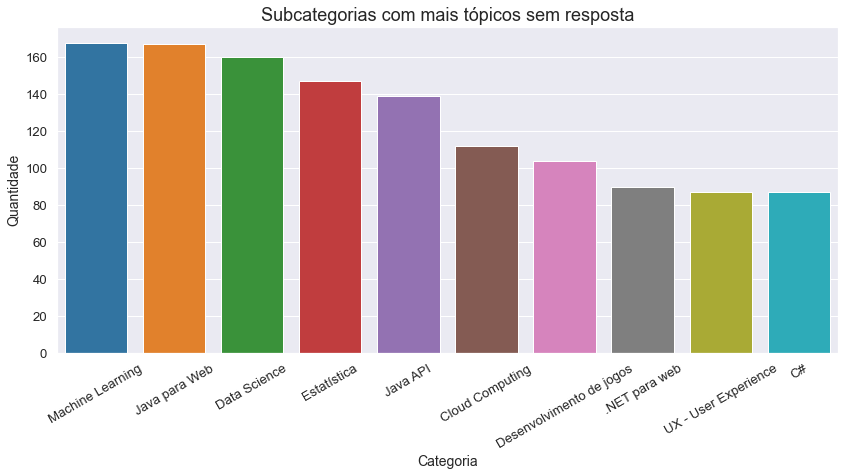

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

dados.sort_values(by= 'qtd_topicos', ascending=False, inplace=True)

sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.2)
ax = sns.barplot(x= 'categoria', y='qtd_topicos', data = dados.head(10))
ax.figure.set_size_inches(14,6)
ax.set_title('Subcategorias com mais tópicos sem resposta', fontsize = 18)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.set_xlabel('Categoria', fontsize = 14)
plt.xticks(rotation=30);

In [107]:
dados.head(10)

,categoria,area_estudo,qtd_topicos
82,Machine Learning,Data Science,168
9,Java para Web,Programação,167
80,Data Science,Data Science,160
87,Estatística,Data Science,147
12,Java API,Programação,139
52,Cloud Computing,DevOps,112
32,Desenvolvimento de jogos,Programação,104
18,.NET para web,Programação,90
61,UX - User Experience,UX & Design,87
17,C#,Programação,87


In [108]:
dados['qtd_topicos'].sum()

3056

In [109]:
areas_estudo = dados.groupby('area_estudo').sum().sort_values(by='qtd_topicos',ascending=False)
areas_estudo

,qtd_topicos
area_estudo,
Programação,1356
Data Science,562
Inovação & Gestão,416
DevOps,334
UX & Design,170
Marketing Digital,124
Front-end,57
Mobile,37


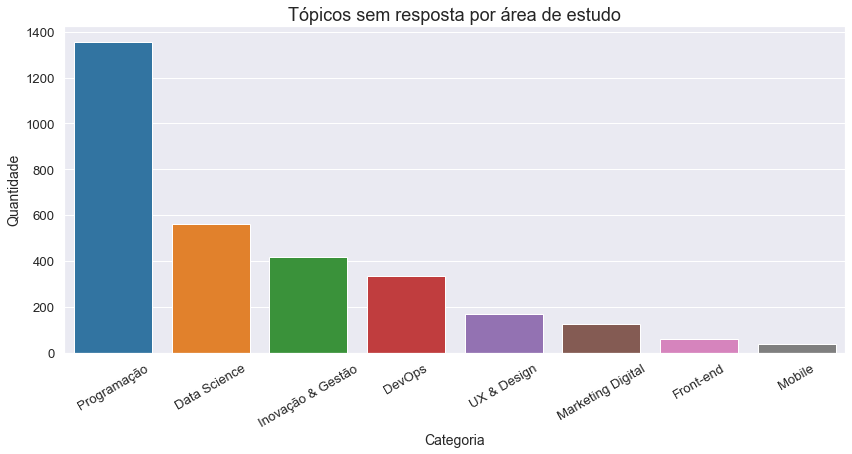

In [110]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.2)
ax = sns.barplot(x= areas_estudo.index, y='qtd_topicos', data = areas_estudo)
ax.figure.set_size_inches(14,6)
ax.set_title('Tópicos sem resposta por área de estudo', fontsize = 18)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.set_xlabel('Categoria', fontsize = 14)
plt.xticks(rotation=30);